/home/jshen27/anaconda3/envs/new_my_env/lib/python3.9/site-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


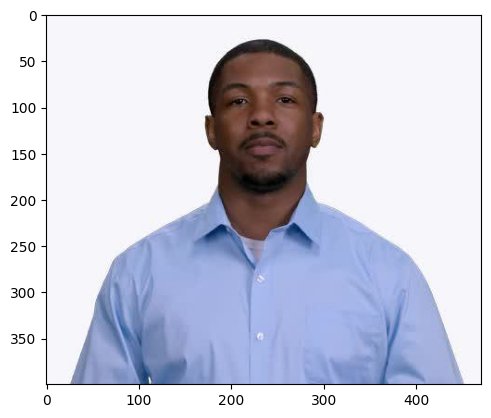

In [5]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")
image = Image.open('image_file_location.jpg')
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]

plt.imshow(image)

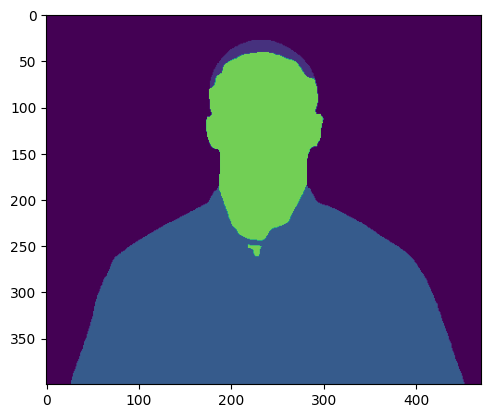

In [6]:
plt.imshow(pred_seg)

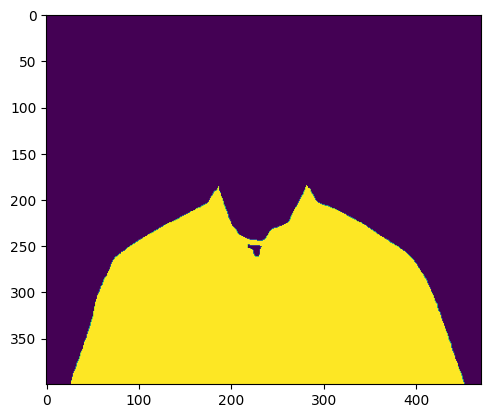

In [7]:
s = (pred_seg == 4)
s = s * 255
plt.imshow(s)
import numpy as np
s = np.array(s)
im = Image.fromarray(s.astype(np.uint8))
destination = 'target_location_to_save_mask.png'
im.save(destination, 'PNG')

In [4]:
im.size

(471, 400)